<a href="https://www.kaggle.com/code/a7madmostafa/learn-classification-with-logistic-regression?scriptVersionId=105418824" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Learn Machine Learning by Projects** : Based on ML Bookcamp 

[The book](https://www.manning.com/books/machine-learning-bookcamp?a_aid=AGMLBookcamp&a_bid=2eb9ca01) , [Original Repo]( https://github.com/alexeygrigorev/mlbookcamp-code )

<img src="https://images.manning.com/360/480/resize/book/d/f91ead8-e9eb-412e-8f75-5f2d7f588e67/Grigorev-MLB-HI.png" width="200">


# Business Understanding

*__Churn Prediction__*

```identifying customers who are likely to cancel their contracts soon.```

* If the company can do that, it can handle users before churn
* The target variable that we want to predict is categorical and has only two possible outcomes:
churn or not churn (Binary Classification).
* We also would like to understand why the model thinks our customers
churn, and for that, we need to be able to interpret the model’s predictions.

* We will use data from https://www.kaggle.com/blastchar/telco-customer-churn.

* According to the description, this dataset has the following information:
    * __Services of the customers__: phone; multiple lines; internet; tech support and extra services such as online security, backup, device protection, and TV streaming
    * __Account information__: how long they have been clients, type of contract, type of
payment method
    * __Charges__: how much the client was charged in the past month and in total
    * __Demographic information__: gender, age, and whether they have dependents or a partner
    * __Churn__: yes/no, whether the customer left the company within the past month

# Initial Data Preparation

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.describe(include='O').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


## Customer ID
> It is not an important feature, we will drop it

In [6]:
df.drop('customerID', axis=1, inplace=True)
df.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


## Total Charges
> from description, it has white space in 11 rows, we need to handle it

In [7]:
df.TotalCharges.describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [8]:
df[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
len(df[df['TotalCharges']==' '])

11

In [10]:
# Convert the "TotalCharges" column to numeric and enforce white spaces to be 'NaN'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
len(df[df['TotalCharges']==' '])

0

In [12]:
# Just Confirm
df.iloc[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754],:]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


## Senior Citizen
> To be treated as category

In [13]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

## Some Cleaning

In [14]:
df.columns = df.columns.str.lower()

In [15]:
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

## Churn

In [16]:
df[df.churn == 'Yes']

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


### Convert `churn` to Numerical Value

In [17]:
(df.churn == 'Yes').astype(int)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [18]:
df.churn = (df.churn == 'Yes').astype(int)

In [19]:
df.churn.value_counts()  #imbalance

0    5174
1    1869
Name: churn, dtype: int64

In [20]:
df.churn.value_counts(normalize= True)

0    0.73463
1    0.26537
Name: churn, dtype: float64

In [21]:
df.churn.mean()

0.2653698707936959

# Data Splitting 

### We split the full data into : ( Training Set, Validation Set, Testing Set)
* `Training Set`: to traion our model
* `Validation Set`: to validate and tune the model(s) 
* `Testing Set`: to evaluate the final model (after tuning and selecting the best one)

In [22]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_valid = train_test_split(df_full_train, test_size=0.2, random_state=1)
print("Training Data Size: ", df_train.shape)
print("Validation Data Size: ", df_valid.shape)
print("Testing Data Size: ", df_test.shape)

Training Data Size:  (4507, 20)
Validation Data Size:  (1127, 20)
Testing Data Size:  (1409, 20)


## Missing Values

In [23]:
df_train.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        6
churn               0
dtype: int64

#### We have missing values in `totalcharges`, we need to find the best value to impute it

count    4501.000000
mean     2240.586892
std      2248.575970
min        18.800000
25%       385.550000
50%      1360.250000
75%      3713.950000
max      8684.800000
Name: totalcharges, dtype: float64


<AxesSubplot:>

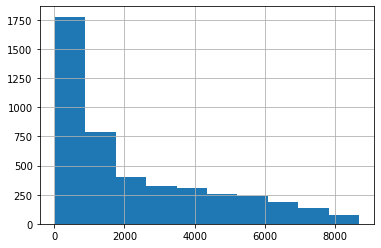

In [24]:
print(df_train['totalcharges'].describe())
df_train['totalcharges'].hist()

#### As the distribution of `totalcharges` is `skewed`, we can impute the missing values with its `median`

#### Note: we calculated the median of `totalcharges` from the `training set` and it will be used for other sets

In [25]:
df_train.totalcharges.isnull().sum()

6

In [26]:
df_valid.totalcharges.isnull().sum()

2

In [27]:
df_test.totalcharges.isnull().sum()

3

In [28]:
total_charges_median = df_train['totalcharges'].median()

# Imputing 
df_train['totalcharges'] = df_train['totalcharges'].fillna(total_charges_median)
df_valid['totalcharges'] = df_valid['totalcharges'].fillna(total_charges_median)
df_test['totalcharges'] = df_test['totalcharges'].fillna(total_charges_median)

print(df_train.totalcharges.isnull().sum())
print(df_valid.totalcharges.isnull().sum())
print(df_test.totalcharges.isnull().sum())

0
0
0


# EDA

#### Note: EDA usually contains many visualizations, but actually we will make it simpler

In [29]:
df_train.select_dtypes(include=['object']).columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object')

In [30]:
categorical = list(df_train.select_dtypes(include=['object']).columns)
numerical = list(df_train.select_dtypes(include=['number']).columns)

In [31]:
numerical.remove('churn')

In [32]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [33]:
df_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature Importance
``` It’s often done as a part of exploratory data analysis to figure out which variables will be useful for the model.```
 
```It also gives us additional insights about the dataset and helps answer questions like “What makes customers churn?” and “What are the characteristics of people who churn?”```

### Risk Ratio
> risk = group rate / global rate

* ` a group with a risk close to 1 is not risky at all`
* ` a group with a risk lower than 1:, the clients in this group are less likely to churn than clients in general`
* ` a group with a risk higher than 1: there’s more churn in the group than in the population, `

In [34]:
global_mean = df_train.churn.mean()
round(global_mean, 2)

0.27

In [35]:
df_train.groupby('gender').mean()['churn']

gender
Female    0.274258
Male      0.261778
Name: churn, dtype: float64

In [36]:
churn_gender = df_train.groupby('gender').churn.mean()
churn_gender  # we can compare it with the global churn rate

gender
Female    0.274258
Male      0.261778
Name: churn, dtype: float64

> the difference between the rates is small, the value is not important when predicting churn because this group of customers is not really different from the rest of the customers. 

In [37]:
churn_partner = df_train.groupby('partner').churn.mean()
churn_partner

partner
No     0.325838
Yes    0.204651
Name: churn, dtype: float64

> the difference is not small, something inside that group sets it apart from the rest. A machine learning algorithm should be able to pick this up and use it when making predictions.

In [38]:
gender_risk = churn_gender / global_mean
gender_risk

gender
Female    1.023245
Male      0.976682
Name: churn, dtype: float64

In [39]:
partner_risk = churn_partner / global_mean
partner_risk

partner
No     1.215688
Yes    0.763545
Name: churn, dtype: float64

### Let's conclude `Risk Ratio` for all categorical features in tables

In [40]:
from IPython.display import display
for feature in categorical:                                           
    df_group = df_train.groupby(by=feature).churn.agg(['mean']) 
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
gender,,,
Female,0.274258,0.00623,1.023245
Male,0.261778,-0.00625,0.976682


,mean,diff,risk
seniorcitizen,,,
0,0.241700,-0.026328,0.901773
1,0.401617,0.133590,1.498418


,mean,diff,risk
partner,,,
No,0.325838,0.057810,1.215688
Yes,0.204651,-0.063376,0.763545


,mean,diff,risk
dependents,,,
No,0.312599,0.044572,1.166295
Yes,0.164454,-0.103573,0.613572


,mean,diff,risk
phoneservice,,,
No,0.249438,-0.018589,0.930644
Yes,0.270064,0.002036,1.007598


,mean,diff,risk
multiplelines,,,
No,0.253358,-0.014669,0.945269
No phone service,0.249438,-0.018589,0.930644
Yes,0.289017,0.020990,1.078312


,mean,diff,risk
internetservice,,,
DSL,0.195232,-0.072796,0.728403
Fiber optic,0.421779,0.153752,1.573641
No,0.080080,-0.187947,0.298776


,mean,diff,risk
onlinesecurity,,,
No,0.419964,0.151937,1.566869
No internet service,0.080080,-0.187947,0.298776
Yes,0.151090,-0.116937,0.563712


,mean,diff,risk
onlinebackup,,,
No,0.396020,0.127992,1.477535
No internet service,0.080080,-0.187947,0.298776
Yes,0.221629,-0.046399,0.826888


,mean,diff,risk
deviceprotection,,,
No,0.392514,0.124486,1.464454
No internet service,0.080080,-0.187947,0.298776
Yes,0.229915,-0.038112,0.857804


,mean,diff,risk
techsupport,,,
No,0.416554,0.148526,1.554145
No internet service,0.080080,-0.187947,0.298776
Yes,0.159599,-0.108428,0.595458


,mean,diff,risk
streamingtv,,,
No,0.344674,0.076646,1.285964
No internet service,0.080080,-0.187947,0.298776
Yes,0.297376,0.029349,1.109498


,mean,diff,risk
streamingmovies,,,
No,0.338609,0.070582,1.263338
No internet service,0.080080,-0.187947,0.298776
Yes,0.304198,0.036170,1.134950


,mean,diff,risk
contract,,,
Month-to-month,0.432509,0.164482,1.613674
One year,0.115822,-0.152205,0.432128
Two year,0.027027,-0.241000,0.100837


,mean,diff,risk
paperlessbilling,,,
No,0.171566,-0.096462,0.640106
Yes,0.336495,0.068467,1.255448


,mean,diff,risk
paymentmethod,,,
Bank transfer (automatic),0.164622,-0.103406,0.614197
Credit card (automatic),0.175620,-0.092408,0.655231
Electronic check,0.441215,0.173188,1.646157
Mailed check,0.199618,-0.068410,0.744767


### Very Useful Tables, but `Visualization` is better

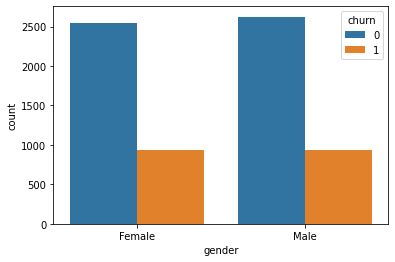

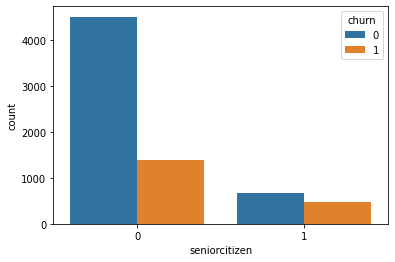

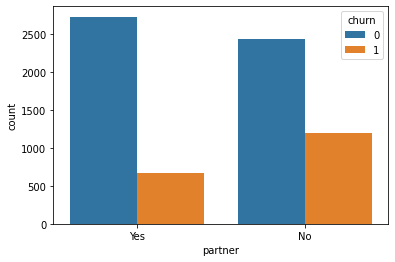

In [41]:
for feature in categorical[:3]:                                           
    _=sns.countplot(x= feature, hue = 'churn', data=df)
    plt.show()

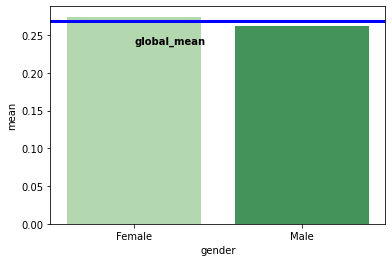

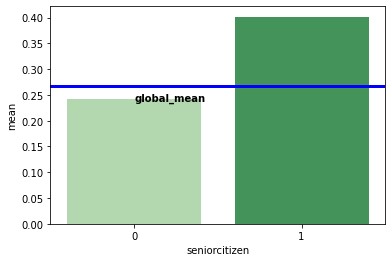

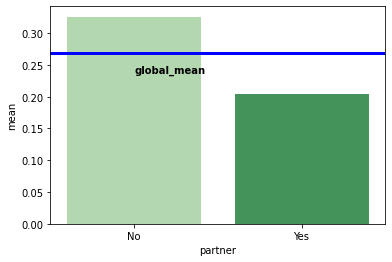

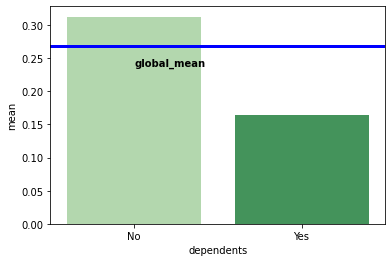

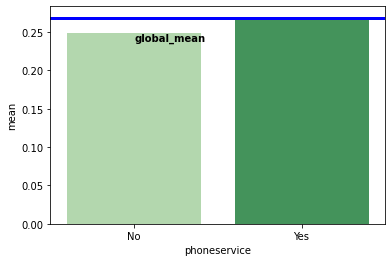

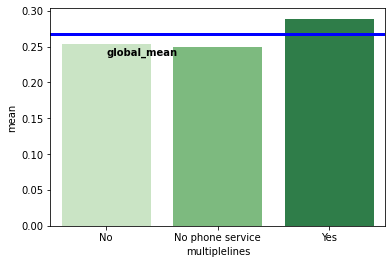

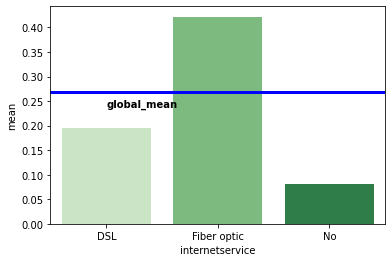

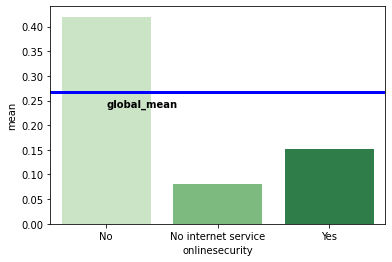

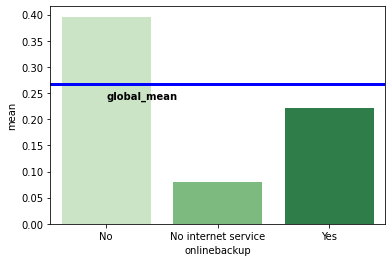

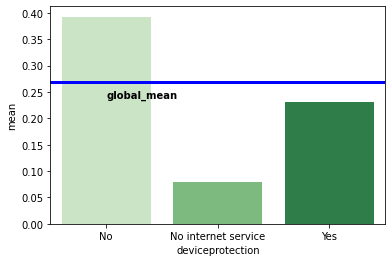

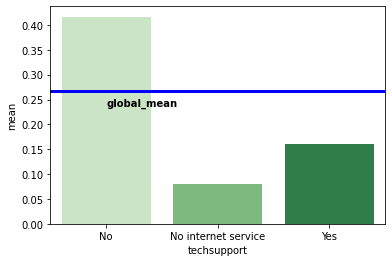

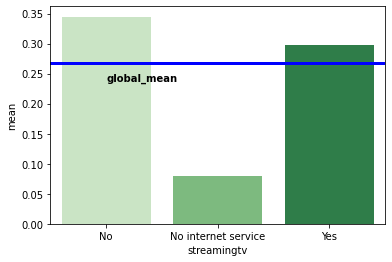

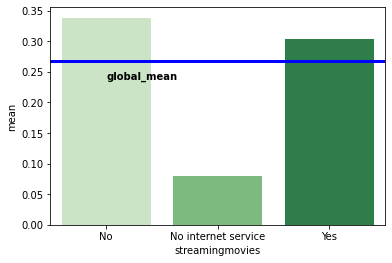

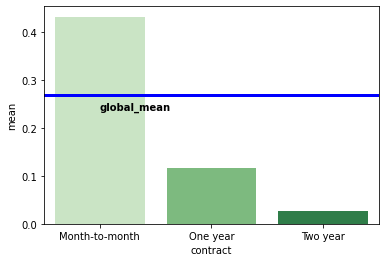

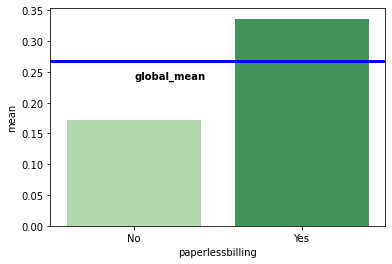

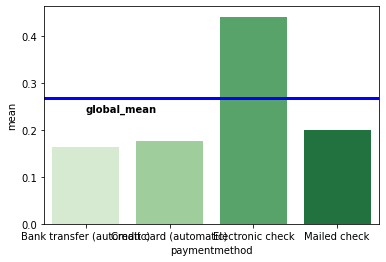

In [42]:
for feature in categorical:                                           
    df_group = df_train.groupby(by=feature).churn.agg(['mean']).reset_index()
    graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')
    graph.axhline(global_mean, linewidth=3, color='b')
    plt.text(0, global_mean - 0.03, "global_mean", color='black', weight='semibold')
    plt.show()

> ### Some Insights
* `For gender, there is not much difference between females and males.`

* Senior citizens tend to churn more than nonseniors.

* `People with a partner churn less than people with no partner.`

* People who use phone service are not at risk of churning. People who don’t use phone service are even less likely to churn.

* `Clients with no tech support tend to churn more than those who do.`

* People with monthly contracts cancel the contract a lot more often than others, and people with two-year contacts churn very rarely.

### Mutual Information
* More efficient to compare features importance
* Mutual information is a way to `quantify` the degree of dependency between two categorical variables, but it doesn’t work when one of the features is numerical
* `MI(feature;target) = Entropy(feature) - Entropy(feature|target)`
* Get more details about Information Gain and Mutual Information: [Click here](https://machinelearningmastery.com/information-gain-and-mutual-information/) and [here](https://towardsdatascience.com/select-features-for-machine-learning-model-with-mutual-information-534fe387d5c8)

In [43]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, df_train.churn)

df_mi = df_train[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
display(df_mi.head())
display(df_mi.tail())

,MI
contract,0.100378
onlinesecurity,0.062802
techsupport,0.059945
internetservice,0.053951
onlinebackup,0.044230


,MI
partner,0.009443
seniorcitizen,0.008396
multiplelines,0.000821
gender,0.000099
phoneservice,0.000098


* `Higher values of mutual information mean a higher degree of dependence: if the mutual information between a categorical variable and the target is high, this categorical variable will be quite useful for predicting the target.` 

* `On the other hand, if the mutual information is low, the categorical variable and the target are independent, and thus the variable will not be useful for predicting the target.`

### Correlation Coefficient
* The correlation coefficient (Pearson’s correlation coefficient). It is a value from –1 to 1
* Positive correlation means that when one variable goes up, the other variable tends to go up as well `(In the case of a binary target, when the values of the variable are high, we see ones more often than zeros. But when the values of the variable are low, zeros become more frequent than ones.)`
* Zero correlation means no relationship between two variables: they are completely independent.
* Negative correlation occurs when one variable goes up and the other goes down. `(In the binary case, if the values are high, we see more zeros than ones in the target variable. When the values are low, we see more ones.)`

In [44]:
df[numerical].corrwith(df.churn)

tenure           -0.352229
monthlycharges    0.193356
totalcharges     -0.199484
dtype: float64

#### Tenure
> The correlation between `tenure` and `churn` is –0.35: it has a negative sign, so the longer customers stay, the less often they tend to churn

In [45]:
t1 =df[df['tenure'] <= 2].churn.mean()
t1

0.5835266821345708

In [46]:
t2 = df[(df.tenure >= 3) & (df.tenure <= 12)].churn.mean()
t2 

0.4033232628398791

In [47]:
t3 = df[df['tenure'] >= 12].churn.mean()
t3

0.17490952955367914

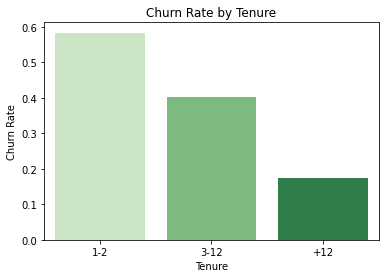

In [48]:
sns.barplot(x =['1-2', '3-12', '+12'], y =[t1,t2,t3], palette='Greens');
plt.title('Churn Rate by Tenure');
plt.xlabel('Tenure');
plt.ylabel('Churn Rate');

#### Monthly Charges
> `monthlycharges` has a positive coefficient of 0.19, which means that customers who pay more tend to leave more often. 

In [49]:
mc1 =df[df['monthlycharges'] <= 20].churn.mean()
mc1

0.08841463414634146

In [50]:
mc2 = df[(df.monthlycharges >= 21) & (df.monthlycharges <= 50)].churn.mean()
mc2

0.22807017543859648

In [51]:
mc3 = df[df['monthlycharges'] > 50].churn.mean()
mc3

0.3178752107925801

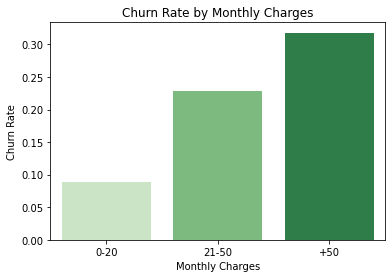

In [52]:
sns.barplot(x =['0-20', '21-50', '+50'], y =[mc1,mc2,mc3], palette='Greens');
plt.title('Churn Rate by Monthly Charges');
plt.xlabel('Monthly Charges');
plt.ylabel('Churn Rate');

#### Total Charges
> `totalcharges` has a negative correlation, which makes sense: the longer people stay with the company, the more they have paid in total, so it’s less likely that they will leave.

In [53]:
tc1 = df[df['totalcharges'] <= 1000].churn.mean()
tc1

0.36985827860352577

In [54]:
tc2 = df[(df.totalcharges > 1000) & (df.totalcharges <= 5000)].churn.mean()
tc2

0.2137150466045273

In [55]:
tc3 = df[df['totalcharges'] > 5000].churn.mean()
tc3

0.13832599118942732

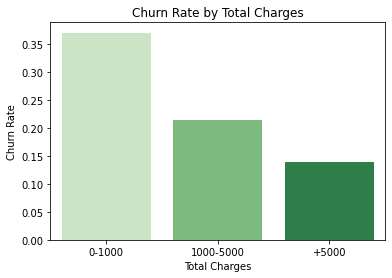

In [56]:
sns.barplot(x =['0-1000', '1000-5000', '+5000'], y =[tc1,tc2,tc3], palette='Greens');
plt.title('Churn Rate by Total Charges');
plt.xlabel('Total Charges');
plt.ylabel('Churn Rate');

### Note: We will try to train and evaluate our model with `all features` and with `most important ones` and compare both models

# Preprocessing

## Handling Categorical Variables `one-hot encoding`

In [57]:
# Applying one hot encoding using Pandas

df_train_enc= pd.get_dummies(df_train, drop_first=True)
df_train_enc.head()

,tenure,monthlycharges,totalcharges,churn,gender_Male,seniorcitizen_1,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,...,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
2678,30,19.70,625.05,0,1,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,1
5594,23,83.75,1849.95,0,0,0,1,1,1,0,...,0,1,0,0,0,0,1,0,1,0
4077,14,95.80,1346.30,0,0,1,1,1,1,0,...,0,1,0,1,0,0,1,0,1,0
4758,56,19.70,1051.90,0,0,0,0,0,1,0,...,1,0,1,0,0,1,0,0,0,0
4445,63,98.00,6218.45,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0


> ## Attention
* ### Test data should be set aside prior to preprocessing.
* ### Any statistics such as mean, min and max used for preprocessing should be derived from the training data. 
* ### Otherwise, there will be a data leakage problem.

In [58]:
# Applying one hot encoding using Sklearn

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

ohe = OneHotEncoder(drop='first')

transformer = make_column_transformer((ohe, categorical), remainder='passthrough',
                                      verbose_feature_names_out=False)

train_enc = transformer.fit_transform(df_train)
df_train_enc = pd.DataFrame(train_enc, columns=transformer.get_feature_names_out())
df_train_enc

,gender_Male,seniorcitizen_1,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,...,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,tenure,monthlycharges,totalcharges,churn
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,30.0,19.70,625.05,0.0
1,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,23.0,83.75,1849.95,0.0
2,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,14.0,95.80,1346.30,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,56.0,19.70,1051.90,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,63.0,98.00,6218.45,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,52.0,80.85,4079.55,0.0
4503,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,18.0,25.15,476.80,0.0
4504,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,90.00,190.05,1.0
4505,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,27.0,24.50,761.95,0.0


In [59]:
X_train = df_train_enc.drop('churn', axis=1)
y_train = df_train_enc['churn']

In [60]:
valid_enc = transformer.transform(df_valid)
df_valid_enc = pd.DataFrame(valid_enc, columns=transformer.get_feature_names_out())
X_valid = df_valid_enc.drop('churn', axis=1)
y_valid = df_valid_enc['churn']

test_enc = transformer.transform(df_test)
df_test_enc = pd.DataFrame(test_enc, columns=transformer.get_feature_names_out())
X_test = df_test_enc.drop('churn', axis=1)
y_test = df_test_enc['churn']

## Scaling Numerical Variables `Standard Scaler`

In [61]:
df_train[numerical].describe()

,tenure,monthlycharges,totalcharges
count,4507.000000,4507.000000,4507.000000
mean,32.001553,64.312536,2239.414932
std,24.558539,30.089423,2247.307720
min,0.000000,18.250000,18.800000
25%,8.000000,34.700000,386.850000
50%,28.000000,70.150000,1360.250000
75%,55.000000,89.575000,3708.000000
max,72.000000,118.350000,8684.800000


In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit_transform(df_train[numerical])

array([[-0.08151035, -1.48282956, -0.71843479],
       [-0.36657522,  0.64606159, -0.17332212],
       [-0.7330872 ,  1.04657898, -0.3974596 ],
       ...,
       [-1.22176983,  0.85379883, -0.91202122],
       [-0.20368101, -1.32328737, -0.6575107 ],
       [-0.93670496,  0.54967152, -0.66209447]])

In [63]:
# Transformers
def preprocess(df_train, df_valid, df_test, num, cat):
    # Define transformers
    ohe = OneHotEncoder(drop='first')
    scaler = StandardScaler()

    transformer = make_column_transformer((scaler, num),
                                           (ohe, cat),
                                          remainder='passthrough',verbose_feature_names_out=False)
    # Fitting & Transformation
    train_enc = transformer.fit_transform(df_train[cat+num])
    valid_enc = transformer.transform(df_valid[cat+num])
    test_enc = transformer.transform(df_test[cat+num])
    columns=transformer.get_feature_names_out()
   
    return train_enc , valid_enc, test_enc, columns

# Splitting to Features and Target
def split(enc_data):
    return enc_data[:,:-1], enc_data[:,-1] 

In [64]:
train_enc, valid_enc, test_enc, columns = preprocess(df_train, df_valid, df_test, numerical, categorical)
X_train, y_train = split(train_enc)
X_valid, y_valid = split(valid_enc)
X_test, y_test = split(test_enc)

# Modelling
* We will use logistic regression as a classification model

 ## Logistic Regression in breif

* Logistic regression is a linear model, but unlike linear regression, it’s a classification model
* The output of logistic regression is probability; the probability that the observation is positive, or, in other words, the probability that y = 1. `For our case, it’s the probability that the customer will churn.`
* To be able to treat the output as a probability, we need to make sure that the predictions of the model always stay between zero and one. We use a special mathematical function for this purpose called `sigmoid`, and the full formula for the logistic regression model is:

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781617296819/files/OEBPS/Images/03_23-Equation_3-3.png)

* The sigmoid function maps any value to a number between zero and one. It’s defined this way:

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781617296819/files/OEBPS/Images/03_24.png)

 ### Linear Regression vs. Logistic Regression

```
def linear_regression(xi):
    result = bias
    for j in range(n):
        result = result + xi[j] * w[j]
    return result
```
******

```
def logistic_regression(xi):
    score = bias
    for j in range(n):
        score = score + xi[j] * w[j]
    prob = sigmoid(score)
    return prob
```  

```
import math
def sigmoid(score):
    return 1 / (1 + math.exp(-score))
```

## Applying Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [66]:
y_val_pred = model.predict_proba(X_valid)
y_val_pred

array([[9.98700592e-01, 1.29940758e-03],
       [1.06023074e-01, 8.93976926e-01],
       [1.20390148e-01, 8.79609852e-01],
       ...,
       [9.94957308e-01, 5.04269171e-03],
       [9.98705445e-01, 1.29455549e-03],
       [9.99619707e-01, 3.80292891e-04]])

In [67]:
y_test_pred = model.predict_proba(X_test)
y_test_pred

array([[5.71683091e-01, 4.28316909e-01],
       [9.46107341e-01, 5.38926590e-02],
       [3.11793092e-01, 6.88206908e-01],
       ...,
       [6.63595488e-01, 3.36404512e-01],
       [9.99789477e-01, 2.10522684e-04],
       [9.98550641e-01, 1.44935926e-03]])

In [68]:
y_test_pred[:,1]

array([4.28316909e-01, 5.38926590e-02, 6.88206908e-01, ...,
       3.36404512e-01, 2.10522684e-04, 1.44935926e-03])

> This output (probabilities) is often called `soft predictions`. These tell us the probability of churning as a number between zero and one. It’s up to us to decide how to interpret this number and how to use it.

> To get the binary predictions, `hard predictions`, we take the probabilities and cut them above a certain threshold

In [69]:
y_test_pred[:,1] > 0.5

array([False, False,  True, ..., False, False, False])

In [70]:
y_test_pred = (y_test_pred[:,1] > 0.5).astype(int)
y_test_pred

array([0, 0, 1, ..., 0, 0, 0])

In [71]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 1., ..., 0., 0., 0.])

In [72]:
y_test_pred == y_test

array([ True,  True, False, ...,  True,  True,  True])

In [73]:
(y_test_pred == y_test).mean()

0.8743789921930447

In [74]:
print('LogisticRegression Training Accuracy: ', round(model.score(X_train, y_train), 2))
print('LogisticRegression Validation Accuracy: ', round(model.score(X_valid, y_valid), 2))
print('LogisticRegression Testing Accuracy: ', round(model.score(X_test, y_test), 2))

LogisticRegression Training Accuracy:  0.88
LogisticRegression Validation Accuracy:  0.88
LogisticRegression Testing Accuracy:  0.87


## Model Interpretition

In [75]:
w0= model.intercept_[0]
w0

-0.08947945200196279

In [76]:
w_matrix = model.coef_[0]
w_matrix.round(2)

array([-0.91, -0.4 , -0.09, -0.02, -0.56, -0.32,  0.15,  0.1 , -0.19,
       -0.12, -0.2 ,  0.03,  0.03,  0.24,  0.03,  0.  ,  0.03,  0.02,
        0.03,  0.45,  0.03, -0.06,  0.03, -0.3 ,  0.22,  0.35, -0.28,
       -5.3 , -5.71])

In [77]:
w_matrix.shape

(29,)

In [78]:
X_test.shape

(1409, 29)

In [79]:
columns

array(['tenure', 'monthlycharges', 'totalcharges', 'gender_Male',
       'seniorcitizen_1', 'partner_Yes', 'dependents_Yes',
       'phoneservice_Yes', 'multiplelines_No phone service',
       'multiplelines_Yes', 'internetservice_Fiber optic',
       'internetservice_No', 'onlinesecurity_No internet service',
       'onlinesecurity_Yes', 'onlinebackup_No internet service',
       'onlinebackup_Yes', 'deviceprotection_No internet service',
       'deviceprotection_Yes', 'techsupport_No internet service',
       'techsupport_Yes', 'streamingtv_No internet service',
       'streamingtv_Yes', 'streamingmovies_No internet service',
       'streamingmovies_Yes', 'contract_One year', 'contract_Two year',
       'paperlessbilling_Yes', 'paymentmethod_Credit card (automatic)',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check'],
      dtype=object)

In [80]:
dict(zip(columns, w_matrix.round(2)))

{'tenure': -0.91,
 'monthlycharges': -0.4,
 'totalcharges': -0.09,
 'gender_Male': -0.02,
 'seniorcitizen_1': -0.56,
 'partner_Yes': -0.32,
 'dependents_Yes': 0.15,
 'phoneservice_Yes': 0.1,
 'multiplelines_No phone service': -0.19,
 'multiplelines_Yes': -0.12,
 'internetservice_Fiber optic': -0.2,
 'internetservice_No': 0.03,
 'onlinesecurity_No internet service': 0.03,
 'onlinesecurity_Yes': 0.24,
 'onlinebackup_No internet service': 0.03,
 'onlinebackup_Yes': 0.0,
 'deviceprotection_No internet service': 0.03,
 'deviceprotection_Yes': 0.02,
 'techsupport_No internet service': 0.03,
 'techsupport_Yes': 0.45,
 'streamingtv_No internet service': 0.03,
 'streamingtv_Yes': -0.06,
 'streamingmovies_No internet service': 0.03,
 'streamingmovies_Yes': -0.3,
 'contract_One year': 0.22,
 'contract_Two year': 0.35,
 'paperlessbilling_Yes': -0.28,
 'paymentmethod_Credit card (automatic)': -5.3,
 'paymentmethod_Electronic check': -5.71}

# Repeat Training and Evaluation for Most Important Features  

In [81]:
important_cat = df_mi.head().index.to_list()
important_cat

['contract',
 'onlinesecurity',
 'techsupport',
 'internetservice',
 'onlinebackup']

In [82]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [83]:
train_enc, valid_enc, test_enc, columns = preprocess(df_train, df_valid, df_test, numerical, important_cat)
X_train, y_train = split(train_enc)
X_valid, y_valid = split(valid_enc)
X_test, y_test = split(test_enc)

In [84]:
X_train

array([[-0.08151035, -1.48282956, -0.71843479, ...,  0.        ,
         1.        ,  1.        ],
       [-0.36657522,  0.64606159, -0.17332212, ...,  1.        ,
         0.        ,  0.        ],
       [-0.7330872 ,  1.04657898, -0.3974596 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.22176983,  0.85379883, -0.91202122, ...,  1.        ,
         0.        ,  0.        ],
       [-0.20368101, -1.32328737, -0.6575107 , ...,  0.        ,
         1.        ,  1.        ],
       [-0.93670496,  0.54967152, -0.66209447, ...,  1.        ,
         0.        ,  0.        ]])

In [85]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [86]:
print('LogisticRegression Training Accuracy: ', round(model.score(X_train, y_train), 2))
print('LogisticRegression Validation Accuracy: ', round(model.score(X_valid, y_valid), 2))
print('LogisticRegression Testing Accuracy: ', round(model.score(X_test, y_test), 2))

LogisticRegression Training Accuracy:  0.77
LogisticRegression Validation Accuracy:  0.77
LogisticRegression Testing Accuracy:  0.76


 ### Very sufficient Results with less features but important